# Python Plotting

## Examples with multiple packages

Reference: https://opensource.com/article/20/4/plot-data-python

In [1]:
# Python 3.7.3
############################################
# INCLUDES
############################################
#libraries specific to this example
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as matplt
import matplotlib.pyplot as plt

#a set of libraries that perhaps should always be in Python source
import os 
import datetime
import sys
import gc
import getopt
import inspect
import math
import warnings

#a darn useful library for creating paths and one I recommend you load to your environment
from pathlib import Path

from pydoc import help                          # can type in the python console `help(name of function)` to get the documentation

#Data Science Libraries
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage

#Plotting libraries
import matplotlib as matplt
import matplotlib.pyplot as plt

#Import a custom library, in this case a fairly useful logging framework
debug_lib_location = Path("./")
sys.path.append(str(debug_lib_location))
import debug

warnings.filterwarnings('ignore')               # don't print out warnings


root_location="." + os.sep + "data";

In [2]:
############################################
#JUPYTER NOTEBOOK OUTPUT CONTROL / FORMATTING
############################################
#set floating point to 4 places to things don't run loose
pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(precision=4)

# Variable declaration

In [3]:
############################################
# GLOBAL VARIABLES
############################################
DEBUG = 1                            #General ledger output so you know what's happening.
DEBUG_DATA = 1                       #Extremely verbose output, change to zero (0) to supress the volume of output.

# CODE CONSTRAINTS
VERSION_NAME    = "Plotting"
VERSION_ACRONYM = "PLOT"
VERSION_MAJOR   = 0
VERSION_MINOR   = 0
VERSION_RELEASE = 1
VERSION_TITLE   = VERSION_NAME + " (" + VERSION_ACRONYM + ") " + str(VERSION_MAJOR) + "." + str(VERSION_MINOR) + "." + str(VERSION_RELEASE) + " generated SEED."

ENCODING  ="utf-8"
############################################
# GLOBAL CONSTANTS
############################################
    

############################################
# APPLICATION VARIABLES
############################################

############################################
# GLOBAL CONFIGURATION
############################################
os.environ['PYTHONIOENCODING']=ENCODING


## Read the data

### Worth Noting!

The data file provided has UTF-8 encoding that makes most readers crash.  Notice the use of encoding='unicode_escape' which effectively escapes those characters to the reader won't crash.

In [4]:
filename=root_location + os.sep + "temp.txt"

#there are an insane number of options, but generally if you have well structured data it's 'magic'
#Reference:http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv
#changed \t delimiter to ^ which made parsing the columns far easier

#straight from the WAP output with the delimiter modified
df=pd.read_csv(filename, delimiter=',',encoding= 'unicode_escape')


In [5]:
df

,Avg. Temperature (°C),Avg. Temperature (°F),Precipitation / Rainfall (mm)
January,6.9000,44.4000,181
February,7.9000,46.2000,156
March,10.7000,51.3000,137
April,13.9000,57.0000,125
May,18.2000,64.8000,82
June,21.9000,71.4000,63
July,24.9000,76.8000,34
August,24.9000,76.8000,56
September,21.6000,70.9000,109
October,17.1000,62.8000,159


## Matplotlib

Matplotlib is the oldest Python plotting library, and it's still the most popular. It was created in 2003 as part of the SciPy Stack, an open source scientific computing library similar to Matlab.

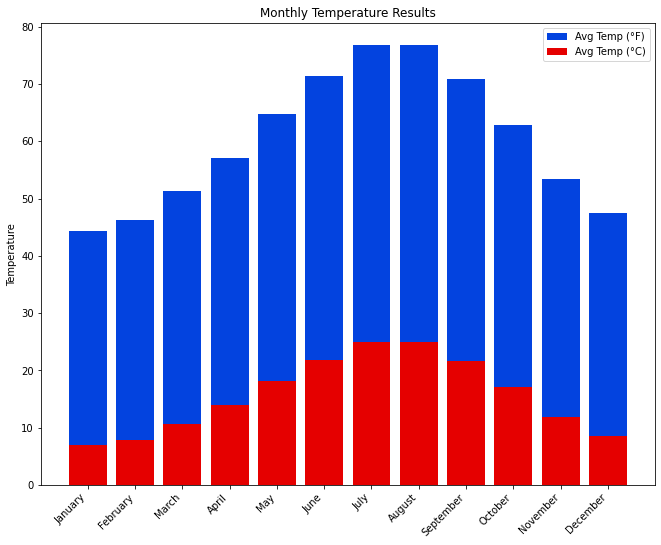

In [6]:
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Initialise a figure. subplots() with no args gives one plot.
    fig, ax = plt.subplots(figsize=(11,8.5))

    # A little data preparation
    x = df.index.values
    temps = df['Avg. Temperature (°F)']
    y=temps
    
    # Plot each bar plot. Note: manually calculating the 'dodges' of the bars
    ax.bar(x,y, label='Avg Temp (°F)', color='#0343df')

    temps = df['Avg. Temperature (°C)']
    y=temps
    ax.bar(x,y, label='Avg Temp (°C)', color='#e50000')

    # Customise some display properties
    ax.set_ylabel('Temperature')
    ax.set_title('Monthly Temperature Results')
    ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
    ax.legend()
    
    #adjust the x labels
    labels=ax.get_xticklabels()
    plt.setp(labels,rotation=45,horizontalalignment='right')
    
    # Ask Matplotlib to show the plot
    plt.show()
    

## Seaborn

Seaborn is an abstraction layer on top of Matplotlib; it gives you a really neat interface to make a wide range of useful plot types very easily.

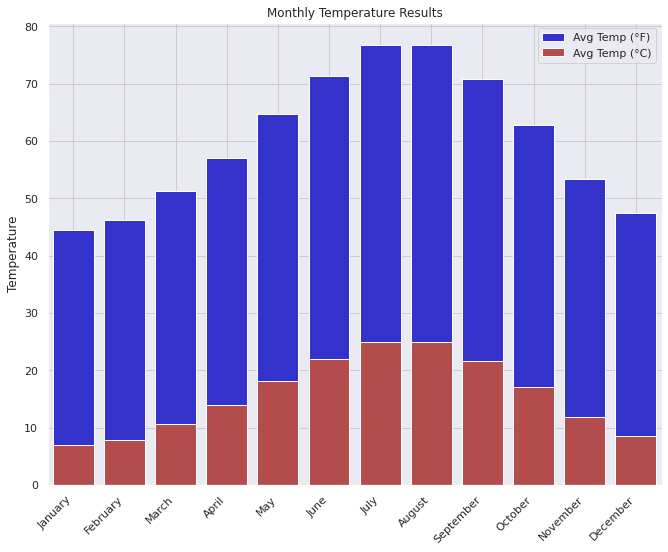

In [7]:
    import seaborn as sns

    # Some boilerplate to initialise things
    sns.set()
    plt.figure(figsize=(11,8.5))

    # A little data preparation
    x = df.index.values
    temps = df['Avg. Temperature (°F)']
    y=temps

    # This is where the actual plot gets made
    ax = sns.barplot(data=df, x=df.index.values, y="Avg. Temperature (°F)", label="Avg Temp (°F)", saturation=0.6, color='blue')
    ax = sns.barplot(data=df, x=df.index.values, y="Avg. Temperature (°C)", label="Avg Temp (°C)", saturation=0.4, color='red')

    # Customise some display properties
    ax.set_ylabel('Temperature')
    ax.set_title('Monthly Temperature Results')
    
    #seaborn flips out with this...so don't do it.
    #ax.set_xticks(x)

    ax.legend()
    ax.grid(color='#cccccc')
    
    #adjust the x labels
    labels=ax.get_xticklabels()
    plt.setp(labels,rotation=45,horizontalalignment='right')


    # Ask Matplotlib to show it
    plt.show()

## Plotly

Plotly is a plotting ecosystem that includes a Python plotting library. It has three different interfaces:

    An object-oriented interface
    An imperative interface that allows you to specify your plot using JSON-like data structures
    A high-level interface similar to Seaborn called Plotly Express

Plotly plots are designed to be embedded in web apps. At its core, Plotly is actually a JavaScript library! It uses D3 and stack.gl to draw the plots.

In [8]:
    import plotly.graph_objects as go
    import plotly.io as pio
    #a domain of many values is available, invoke pio.renderers to see them all.  Could only get browser to work.
    pio.renderers.default = "browser"

    # A little data preparation
    x = list(range(len(df.index.values)))
    y = df['Avg. Temperature (°F)']
    y2 = df['Avg. Temperature (°C)']

    # Specify the plots
    bar_plots = [
        go.Bar(x=x, y=y,  name='Avg Temp (°F)', marker=go.bar.Marker(color='#0343df')),
        go.Bar(x=x, y=y2, name='Avg Temp (°C)', marker=go.bar.Marker(color='#e50000')),
    ]

        
    # Customise some display properties
    layout = go.Layout(
        title=go.layout.Title(text="Monthly Temperature Results", x=0.5),
        yaxis_title="Temperature",
        xaxis_tickmode="array",
        xaxis_tickvals=list(range(12)),
        xaxis_ticktext=tuple(df.index.values),
    )

    # Make the multi-bar plot
    fig = go.Figure(data=bar_plots, layout=layout)

    # Tell Plotly to render it
    fig.show()

ModuleNotFoundError: No module named 'plotly'

## Bokeh

Bokeh (pronounced "BOE-kay") specializes in building interactive plots, so this standard example doesn't show it off to its best. Like Plotly, Bokeh's plots are designed to be embedded in web apps; it outputs its plots as HTML files.

In [14]:
    from IPython.display import display, HTML

    #interactive plotting tools
    from bokeh.plotting import figure, output_file, output_notebook, show
    from bokeh.models import ColumnDataSource, FactorRange, HoverTool
    from bokeh.transform import factor_cmap

    %matplotlib inline
    output_notebook()

    # Specify a file to write the plot to
    output_file("." + os.sep + "temp.html")

    # Tuples of Month, AvgTemp (tricky weird)
    x = [(str(r[0][:]), str(r[1]['Avg. Temperature (°F)'])) for r in df.iterrows()]
    y = df['Avg. Temperature (°F)']

    # Bokeh wraps your data in its own objects to support interactivity
    source = ColumnDataSource(data=dict(x=x, y=y))

    # Create a colourmap
    cmap = {
        'Avg. Temperature (°F)': '#0343df',
    }
    fill_color = factor_cmap('x', palette=list(cmap.values()), factors=list(cmap.keys()), start=1, end=2)

    # Make the plot
    p = figure(x_range=FactorRange(*x), width=1200, title="Monthly Temperature")
    p.vbar(x='x', top='y', width=0.9, source=source, fill_color=fill_color, line_color=fill_color)

    # Customise some display properties
    p.y_range.start = 0
    p.x_range.range_padding = 0.1
    p.yaxis.axis_label = 'Seats'
    p.xaxis.major_label_orientation = 1
    p.xgrid.grid_line_color = None
     
    show(p)

Loading BokehJS ...

## Pandas

Pandas is an extremely popular data science library for Python. It allows you to do all sorts of data manipulation scalably, but it also has a convenient plotting API. Because it operates directly on data frames, the pandas example is the most concise code snippet in this article—even shorter than the Seaborn code!

The pandas API is a wrapper around Matplotlib, so you can also use the underlying Matplotlib API to get fine-grained control of your plots.

Note that the Pandas plotting routines are intended for single instances of data, not side by side comparisons.

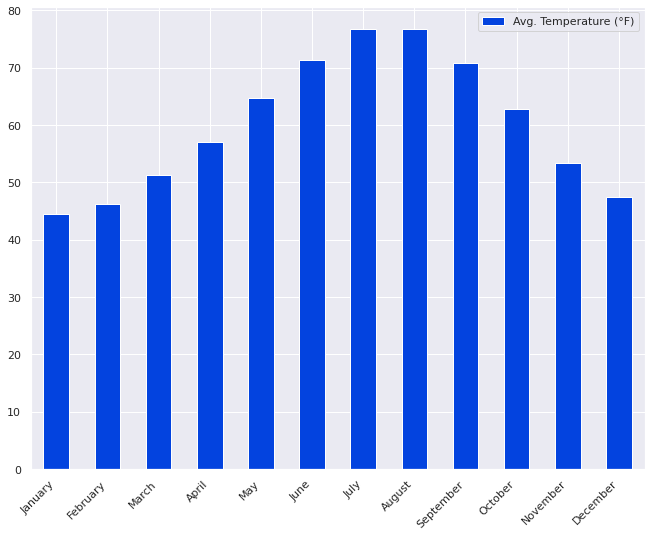

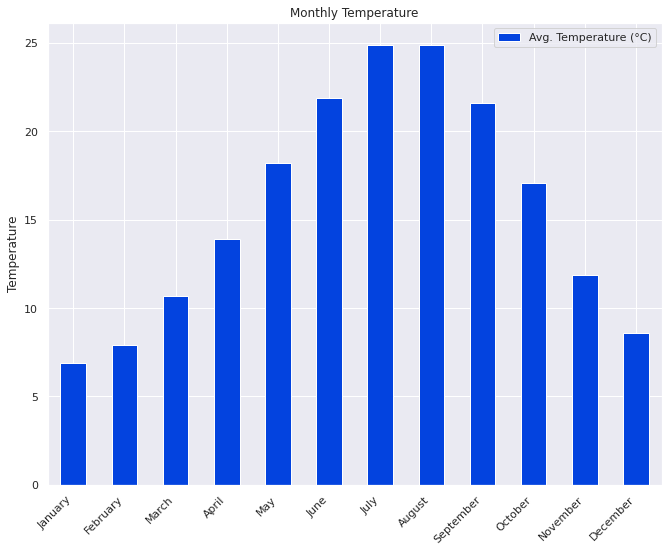

In [10]:
    from matplotlib.colors import ListedColormap

    plt.rcParams['figure.figsize']=(11,8.5)

    # A little data preparation
    x = list(range(len(df.index.values)))
    y = df['Avg. Temperature (°F)']
    y2 = df['Avg. Temperature (°C)']
    
    cmap = ListedColormap(['#0343df', '#e50000', '#ffff14', '#929591'])

    ax = df.plot.bar(y='Avg. Temperature (°F)', colormap=cmap)
    #adjust the x labels
    labels=ax.get_xticklabels()
    plt.setp(labels,rotation=45,horizontalalignment='right')


    ax = df.plot.bar(y='Avg. Temperature (°C)', colormap=cmap)
    #adjust the x labels
    labels=ax.get_xticklabels()
    plt.setp(labels,rotation=45,horizontalalignment='right')

    ax.set_xlabel(None)
    ax.set_ylabel('Temperature')
    ax.set_title('Monthly Temperature')

    
    plt.show()

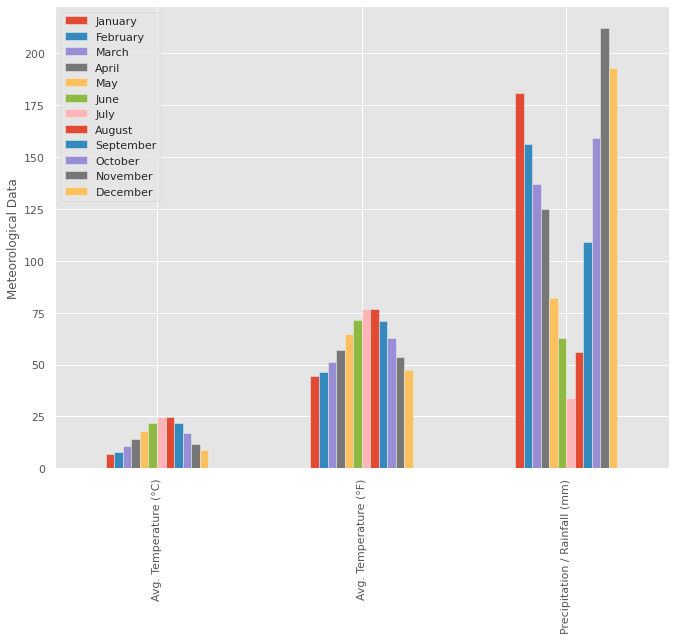

In [12]:
#Pandas quick and dirty
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(11,8.5)
df.T.plot(kind='bar')
plt.ylabel('Meteorological Data')

fig = plt.gcf() # get current figure
fig.savefig("." + os.sep + "pandas_bars.png")

